# GEo

In [1]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Political candidate voting pool analysis'),
    html.P("Select a candidate:"),
    dcc.RadioItems(
        id='candidate',
        options=["Joly", "Coderre", "Bergeron"],
        value="Coderre",
        inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("candidate", "value"))
def display_choropleth(candidate):
    df = px.data.election() # replace with your own data source
    geojson = px.data.election_geojson()
    fig = px.choropleth(
        df, geojson=geojson, color=candidate,
        locations="district", featureidkey="properties.district",
        projection="mercator", range_color=[0, 6500])
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig


app.run(debug=True)

In [3]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df,
                     locations="iso_alpha",
                     size="pop",
                     projection="natural earth"
                     )

fig.update_layout(
    autosize=True,
    height=600,
    geo=dict(
        center=dict(
            lat=51.0057,
            lon=13.7274
        ),
        scope='europe',
        projection_scale=6
    )
)
fig.show();

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

  plz                                           geometry
0   0  POLYGON ((10.97298 51.43217, 10.96683 51.43235...
1   0  POLYGON ((11.44383 51.19882, 11.44412 51.19902...
2   0  POLYGON ((11.68231 51.86335, 11.68312 51.86292...
3   1  POLYGON ((10.72719 53.35731, 10.724 53.35914, ...
4   1  POLYGON ((12.22128 52.86321, 12.22218 52.86281...


/Users/svenschrodt/projects/gesundheit/.venv/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option DTYPE
  return ogr_read(


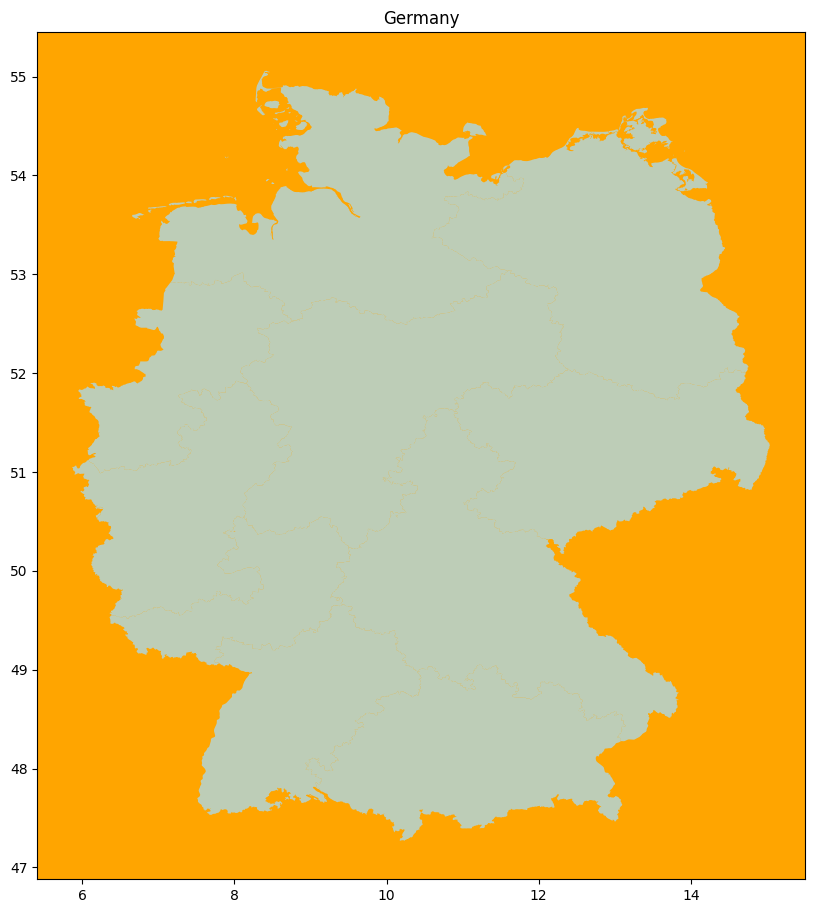

In [17]:
# plz-1stellig.shptail ass
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

plt.rcParams['figure.figsize'] = [16, 11]
plz_shape_df = gpd.read_file('assets/plz-1stellig.shp/plz-1stellig.shp', dtype={'plz': str})
print(plz_shape_df.head())

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='lightblue', alpha=0.8)#
plt.rcParams['figure.figsize'] = [16, 11]



ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='orange'
);

In [ ]:
th = {"coordinates": [[12.283547042260821, 51.091923990161625], [12.284674865274521, 51.09024283413097], [12.28479895613615, 51.08881988414692], [12.28827937444089, 51.088242432226124], [12.28420272625239, 51.085907521683396], [12.280882492655914, 51.08331978723372], [12.274129971530257, 51.077717627886415], [12.27320779281822, 51.07505963671756], [12.272488206707358, 51.07502294470888], [12.26750587822856, 51.07803348758121], [12.265596845867849, 51.076984317794036], [12.269225724712761, 51.07353911423088], [12.269307430379246, 51.07181232862559], [12.266973427981664, 51.0716676969575], [12.266551169166792, 51.069580906216025], [11.446768080677408, 51.19449713168675]], "type": "Polygon"}

for x in th['coordinates']:
    (lt, lg) = x
    #print(f'lt, lg')
    #print(lt, lg)
    ax.plot(
        lt, 
        lg, 
        marker='o',
        c='black', 
        alpha=0.5
    )

In [ ]:
plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);